# Kasus Kanker Payudara

# By Budi Juarto

# Langkah 1 Definisikan Permasalahan

-  Memprediksi apakah kanker masuk ke dalam kategori tidak berbahaya atau ganas
-  30 fitur digunakan sebagai contoh
    - radius
    - texture
    - perimeter
    - area
-  Dataset terpisah dengan menggunakan 30 input features
-  Sample Penelitian : 569
-  Class Distribution : 212 Ganas 357 Tidak Berbahaya
-  Target Class
     -Malignant
     -Benign
     
     
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# Langkah 2 import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(cancer['target_names'])

['malignant' 'benign']


In [9]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
cancer['data'].shape

(569, 30)

In [11]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'],['target']))

In [12]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Langkah 3 Visualisasi Data

C:\Users\ACER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


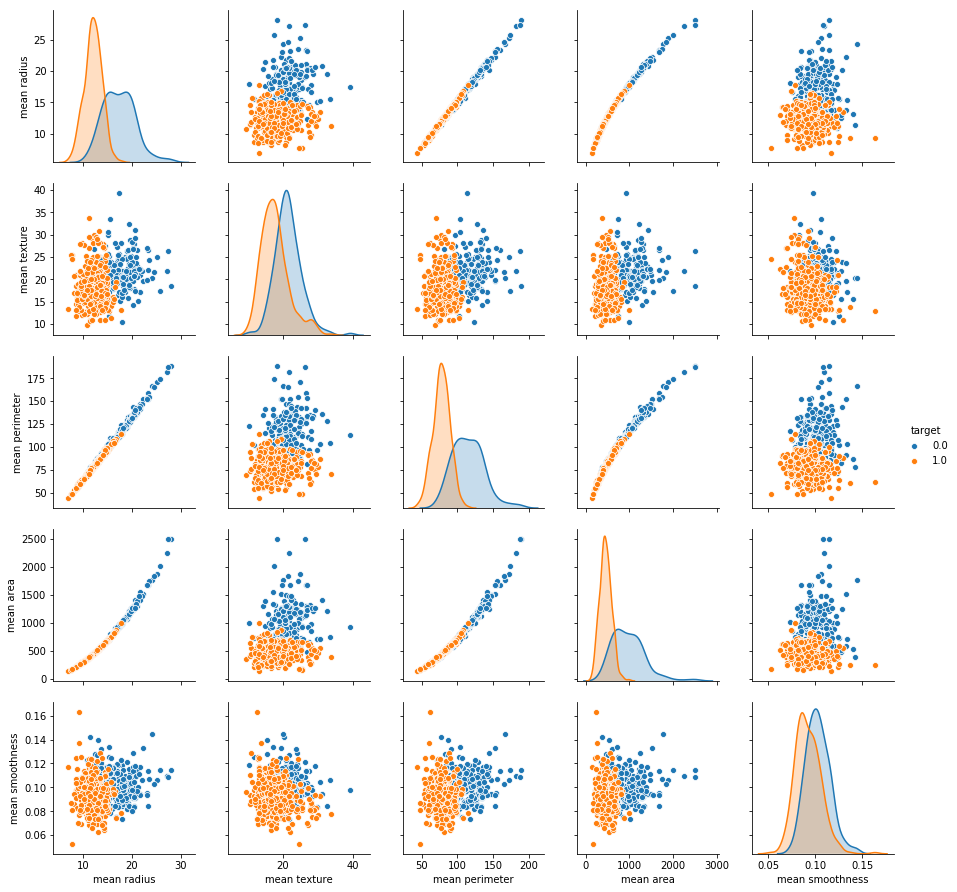

In [13]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

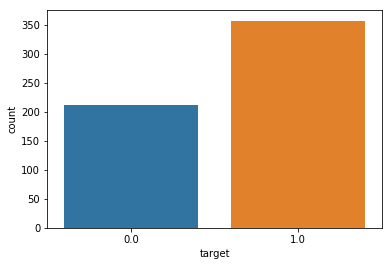

In [14]:
sns.countplot(df_cancer['target'])

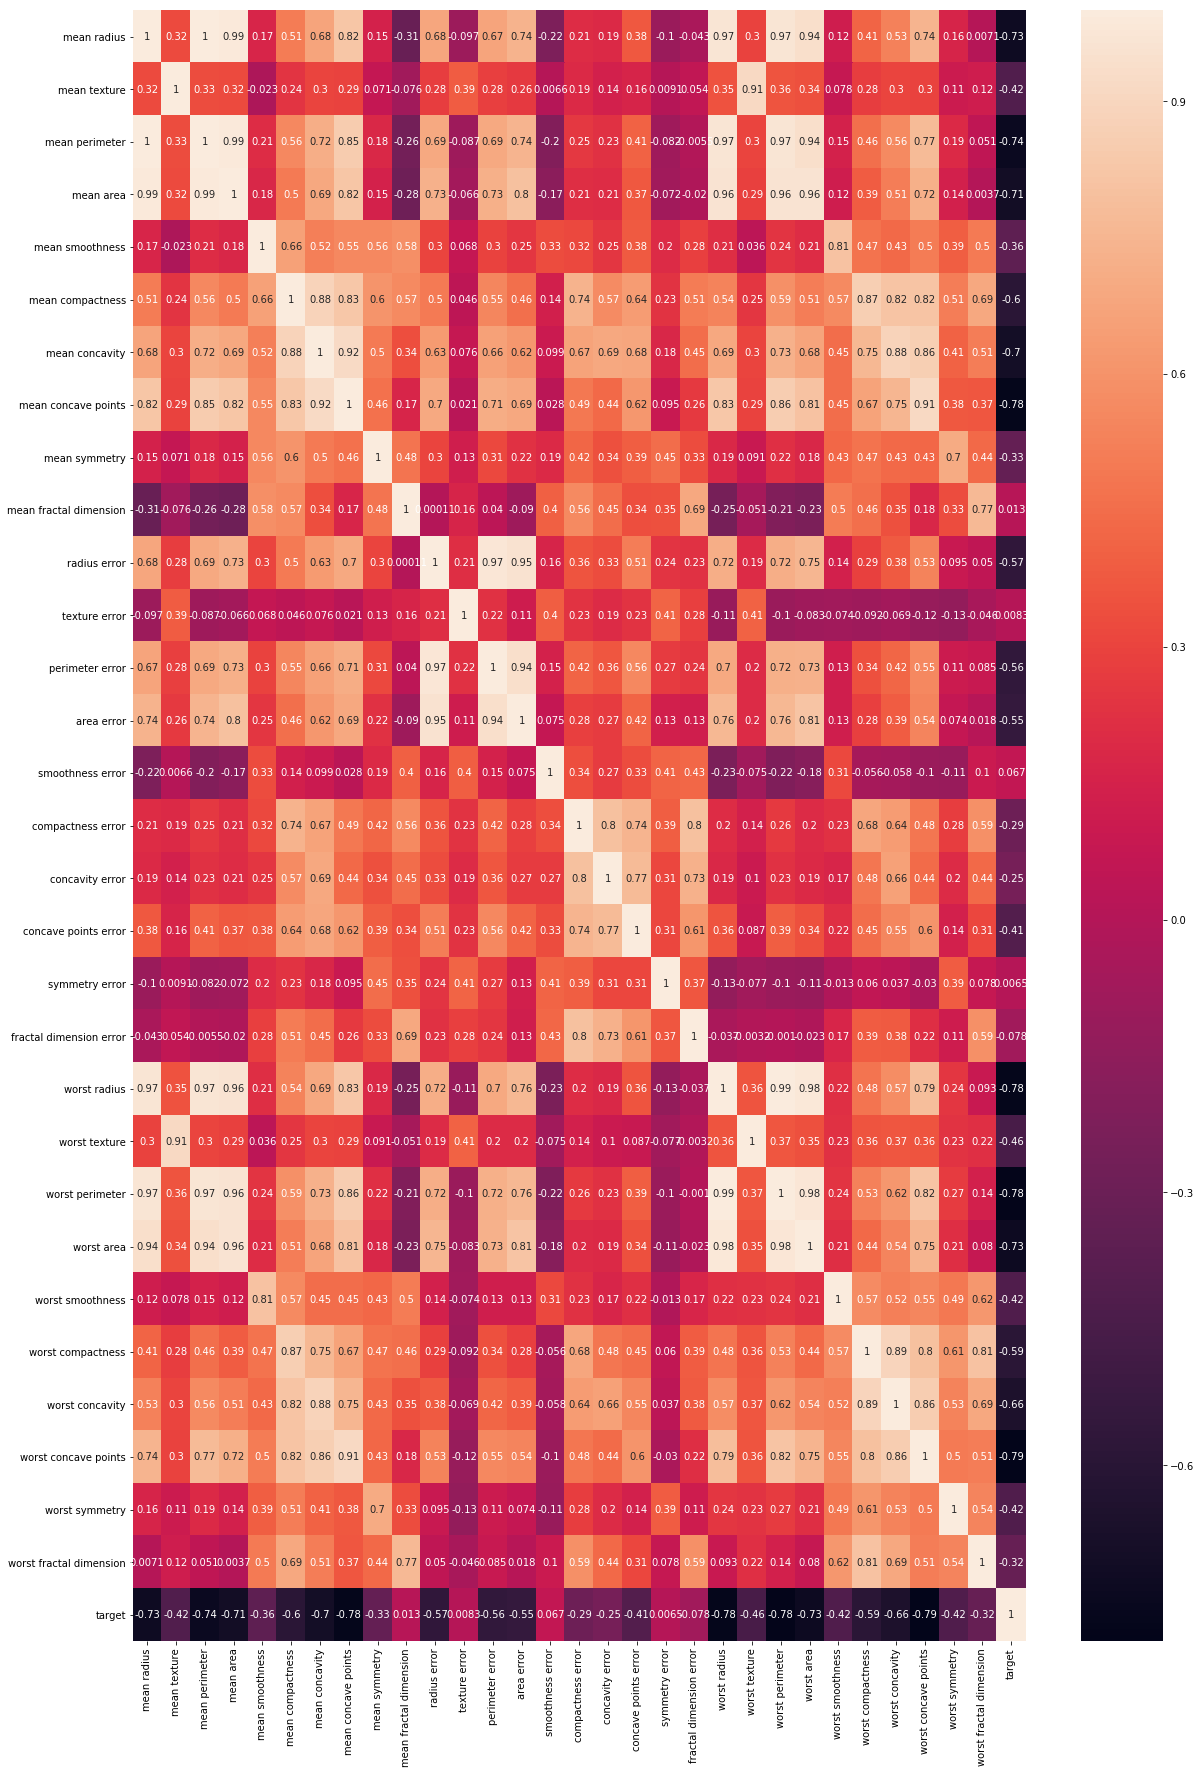

In [15]:
plt.figure(figsize=(20,30))
sns.heatmap(df_cancer.corr(), annot=True)

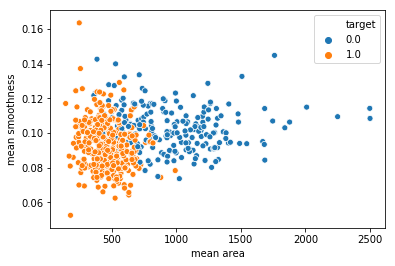

In [16]:
sns.scatterplot(x ='mean area', y='mean smoothness', hue ='target', data = df_cancer)

# Langkah 4 Model Training (Mencari Solusi Permasalahan)

In [17]:
X = df_cancer.drop(['target'], axis =1)

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [19]:
y = df_cancer['target']

In [20]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.109700,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.15310,0.35830,0.583000,0.18270,0.3216,0.10100
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,0.06114,...,14.400,27.01,91.63,645.8,0.09402,0.19360,0.183800,0.05601,0.2488,0.08151
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,0.05961,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.10530,0.3035,0.07661
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.068300,0.030990,0.1781,0.06249,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.190400,0.07625,0.2685,0.07764
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.000000,0.00000,0.2458,0.06592
289,11.370,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.021730,0.2013,0.05955,...,12.360,26.14,79.29,459.3,0.11180,0.09708,0.075290,0.06203,0.3267,0.06994
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.221000,0.12940,0.2567,0.05737
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,0.1551,0.06403,...,10.510,19.16,65.74,335.9,0.15040,0.09515,0.071610,0.07222,0.2757,0.08178


In [26]:
y_train

172    0.0
407    1.0
56     0.0
497    1.0
301    1.0
550    1.0
289    1.0
277    0.0
49     1.0
234    1.0
25     0.0
398    1.0
311    1.0
539    1.0
42     0.0
374    1.0
280    0.0
218    0.0
304    1.0
346    1.0
154    1.0
126    0.0
547    1.0
553    1.0
507    1.0
174    1.0
31     0.0
113    1.0
325    1.0
173    1.0
      ... 
510    1.0
58     1.0
474    1.0
252    0.0
21     1.0
313    1.0
459    1.0
160    1.0
276    1.0
191    1.0
385    0.0
413    1.0
491    1.0
343    0.0
308    1.0
130    1.0
99     0.0
372    0.0
87     0.0
458    1.0
330    0.0
214    0.0
466    1.0
121    0.0
20     1.0
71     1.0
106    1.0
270    1.0
435    0.0
102    1.0
Name: target, Length: 381, dtype: float64

In [27]:
from sklearn.svm import SVC

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
svc_model = SVC()

In [33]:
svc_model.fit(X_train, y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Langkah 5 Evaluasi Model

In [34]:
y_predict = svc_model.predict(X_test)

In [35]:
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [37]:
cm = confusion_matrix(y_test, y_predict)

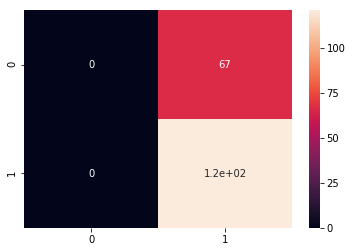

In [38]:
sns.heatmap(cm, annot= True)

# Langkah 6 Improving Model

Normalisasi Data

In [40]:
min_train = X_train.min()

In [43]:
range_train = (X_train - min_train).max()

In [45]:
X_trained_scaled = (X_train - min_train)/range_train

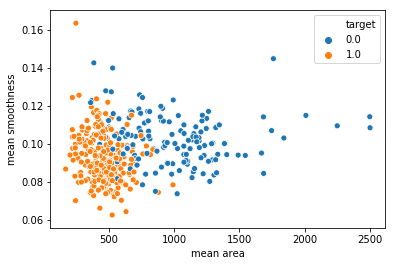

In [46]:
sns.scatterplot ( x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

In [52]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [53]:
svc_model.fit(X_trained_scaled, y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
y_predict = svc_model.predict(X_test_scaled)

In [55]:
cm = confusion_matrix(y_test, y_predict)

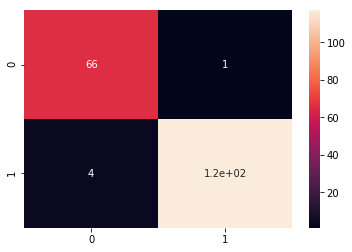

In [56]:
sns.heatmap (cm, annot= True)

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        67
         1.0       0.99      0.97      0.98       121

   micro avg       0.97      0.97      0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



# Improve Kedua

In [87]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

print('\n')
print('The best parameters are ', grid.best_params_)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=1000, gamma=1, kernel=rbf, score=0.6220472440944882, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ... C=1000, gamma=0.1, kernel=rbf, score=0.6171875, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6220472440944882, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .. C=1000, gamma=0.01, kernel=rbf, score=0.6171875, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..............

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.1s finished


In [89]:
grid_predictions = grid.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        67
         1.0       0.97      0.98      0.97       121

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# keakuratan semakin meningkat